In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

**Read in and display a image**

In [64]:
# Read in the image
image = cv2.imread('/content/green screen.jpg')
# Print out the type of image data and its dimensions (height, width, and color)
print("This image is", type(image), " which has dimensions", image.shape)

This image is <class 'numpy.ndarray'>  which has dimensions (720, 1280, 3)


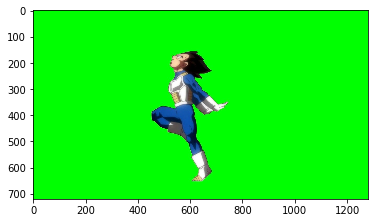

In [65]:
# Make a copy
image_copy = np.copy(image)
# Convert BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
# Display
plt.imshow(image_copy)

**Define color threshold**

In [0]:
lower_bound = np.array([0,50,0])
upper_bound = np.array([5,255,5])

**Create mask**

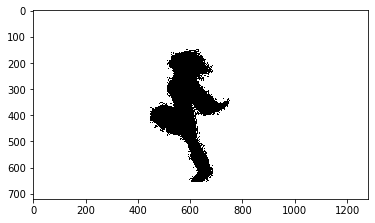

In [67]:
# Define the mask area
mask = cv2.inRange(image_copy, lower_bound, upper_bound)
# Display mask
plt.imshow(mask, cmap='gray')

In [0]:
mask_copy = np.copy(mask)

From the mask, I get the location of pixels that area green and make them black in our original image

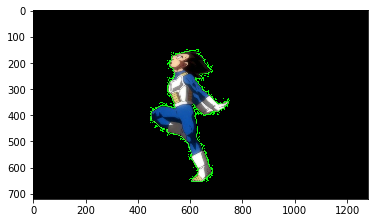

In [69]:
image_copy[mask_copy != 0] = [0,0,0]

plt.imshow(image_copy)

Not sure why got some stubborn green

**Insert background**

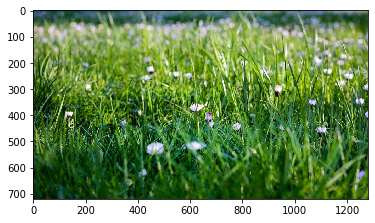

In [85]:
background = cv2.imread("/content/lawn-weeds-1280x720.jpg")
bkgd_copy = np.copy(background)
bkgd_copy = cv2.cvtColor(bkgd_copy, cv2.COLOR_BGR2RGB)
plt.imshow(bkgd_copy)

In [86]:
print("The image has dimensions:", background.shape)

The image has dimensions: (720, 1280, 3)


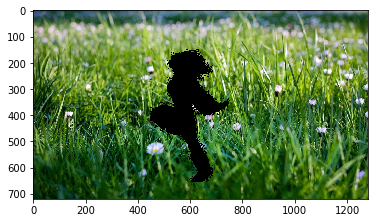

In [87]:
# Mask the background so that character is blocked
bkgd_copy[mask==0] = [0,0,0]
plt.imshow(bkgd_copy)

**Overlay**

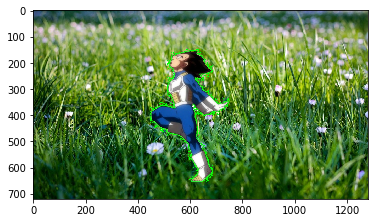

In [88]:
plt.imshow(bkgd_copy + image_copy)